In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import product
from IPython.display import clear_output

import irm_simulator as IRM
from irm_simulator import simulator

rpdf = IRM.cc.rpdf

In [ ]:
sim = simulator()

sim.modify_parameters({'r(s,o)': {'rho': np.array(0.25)},
                       'r(s,d)': {'rho': np.array(0.75)}})
sim.simulate()

fit = simulator()

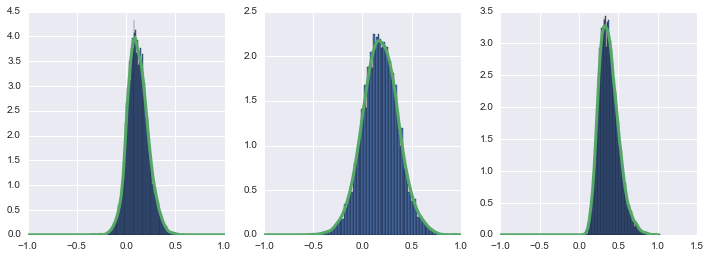

In [15]:
DIA = sim.compute('Intergroup Accentuation').ravel()
DIF = sim.compute('Ingroup Favoritism').ravel()
DSE = sim.compute('Self-Enhancement').ravel()

DIA_kde = gaussian_kde(DIA)
DIF_kde = gaussian_kde(DIF)
DSE_kde = gaussian_kde(DSE)

xi = np.linspace(-1, 1, 100) # for plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].hist(DIA, bins=100, normed=True)
axes[0].plot(xi, DIA_kde.evaluate(xi), lw=3)

axes[1].hist(DIF, bins=100, normed=True)
axes[1].plot(xi, DIF_kde.evaluate(xi), lw=3)

axes[2].hist(DSE, bins=100, normed=True)
axes[2].plot(xi, DSE_kde.evaluate(xi), lw=3)

In [16]:
def logp(x):
    if (np.abs(x > 1).any()):
        return 100000
    #if (x.take([1,3,5]) < 1).any() or (x.take([1,3,5]) > 100).any():
    #    return 100000
    
    fit.modify_parameters({'r(s,i)': {'rho': np.array(x[0])},
                           'r(s,o)': {'rho': np.array(x[1])},
                           'r(s,d)': {'rho': np.array(x[2])}})
    fit.simulate()
    dia = fit.compute('Intergroup Accentuation').ravel()
    dse = fit.compute('Self-Enhancement').ravel()
    dif = fit.compute('Ingroup Favoritism').ravel()
    
    #clear_output()
    #print(x)
    #plt.hist(d, 100, normed=True)
    #plt.plot(xi, kde.pdf(xi), lw=3)
    #plt.xlim((-1, 1))
    #plt.show()
    
    return -(DIA_kde.logpdf(dia).sum() + 
             DIF_kde.logpdf(dif).sum() + 
             DSE_kde.logpdf(dse).sum())

    nfev: 5002
     nit: 1926
  status: 1
 message: 'Maximum number of function evaluations has been exceeded.'
 success: False
     fun: -19483.232180372674
       x: array([ 0.4918693 ,  0.25409491,  0.67077386])


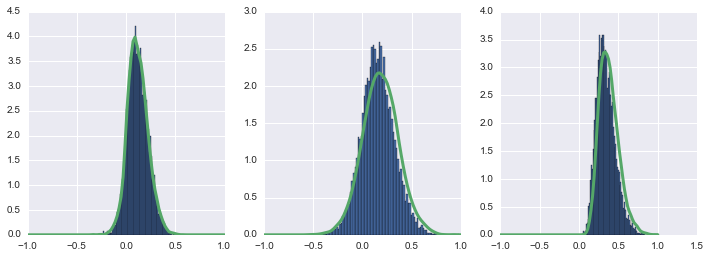

In [17]:
x0 = np.array([0.5, 0.5, 0.5])
x = minimize(logp, x0, method='Nelder-Mead', options={'maxfev': 5000,
                                                      'maxiter': 10000})

print(x)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].hist(fit.compute('Intergroup Accentuation').ravel(),
             bins=100, normed=True)
axes[0].plot(xi, DIA_kde.evaluate(xi), lw=3)

axes[1].hist(fit.compute('Ingroup Favoritism').ravel(),
             bins=100, normed=True)
axes[1].plot(xi, DIF_kde.evaluate(xi), lw=3)

axes[2].hist(fit.compute('Self-Enhancement').ravel(), 
             bins=100, normed=True)
axes[2].plot(xi, DSE_kde.evaluate(xi), lw=3)

In [12]:
# BELOW IS SOMETHING ELSE!
sim.measures

{'Intergroup Accentuation': 'r(i,o)',
 'Ingroup Favoritism': 'r(i,d) - r(o,d)',
 'Self-Enhancement': 'r(s,d) - r(i,d)',
 'Differential Accuracy': 'r(i,<i>) - r(o,<o>)'}

In [17]:
def logp(x):
    if np.abs(x[0]) > 1:
        return 10000
    if x[1] < 1:
        return 10000
    return -np.log(rpdf(D, x[0], x[1])).sum()

x0 = np.array([0, 20])
x = minimize(logp, x0, method='Nelder-Mead')
x

     nit: 117
  status: 0
     fun: -14103.706180758738
 message: 'Optimization terminated successfully.'
 success: True
       x: array([  0.74961525,  55.716573  ])
    nfev: 224

In [ ]:
def f(z):
    f(x)*f(z/x)*(1/abs(x))

In [49]:
mu = np.linspace(-1, 1, 100)
N = np.linspace(1, 50, 100)

p = np.nan + np.empty((mu.size, N.size))
for i, m in enumerate(mu):
    for j,n in enumerate(N):
        p[i,j] = logp(D, m, n)
minp = p[np.isfinite(p)].min()
p = np.where(~np.isfinite(p), minp, p)

In [50]:
Mx, Nx = np.unravel_index(p.argmax(), p.shape)

mu[Mx], N[Nx]

(-0.49494949494949492, 14.85858585858586)

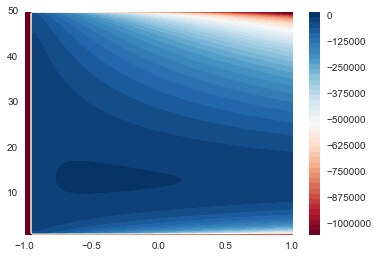

In [51]:
#plt.pcolor(mu, N, p, cmap='RdBu', vmin=p.min(), vmax=p.max())
plt.contourf(mu, N, p, 50, cmap='RdBu')
plt.colorbar()

0.49949949949949946

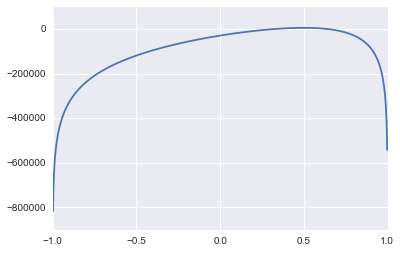

In [73]:
mu = np.linspace(-1, 1, 100)
N = np.linspace(1, 50, 100)

p = np.nan + np.empty_like(mu)
for i, m in enumerate(mu):
    p[i] = np.log(rpdf(D, m, 26)).sum()
plt.plot(mu, p)

imx = np.argmax(p)
mu[imx]

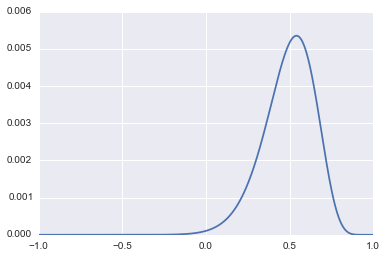

In [59]:
x = np.linspace(-1, 1, 1000)
dx = np.diff(x).mean()

y = IRM.cc.rpdf(x, 0.5, 26) * dx

plt.plot(x, y)

In [57]:
D =

4888.5660613821747

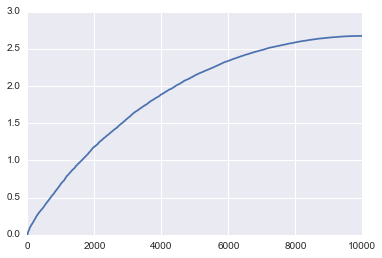

In [54]:
plt.plot(np.sort(rpdf))